In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
from fuzzywuzzy import process
from sklearn.preprocessing import LabelEncoder

In [54]:
df = pd.read_csv('/Users/tanjinapial/Downloads/survey_results_public.csv')

Demographic Distribution For Age

In [6]:

age_mapping = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}


df['AgeGroup'] = df['Age'].map(age_mapping)


In [7]:
print(df[['Age', 'AgeGroup']].head(10))


                  Age AgeGroup
0  Under 18 years old      <18
1     35-44 years old    35-44
2     45-54 years old    45-54
3     18-24 years old    18-24
4     18-24 years old    18-24
5  Under 18 years old      <18
6     35-44 years old    35-44
7     18-24 years old    18-24
8     45-54 years old    45-54
9     35-44 years old    35-44


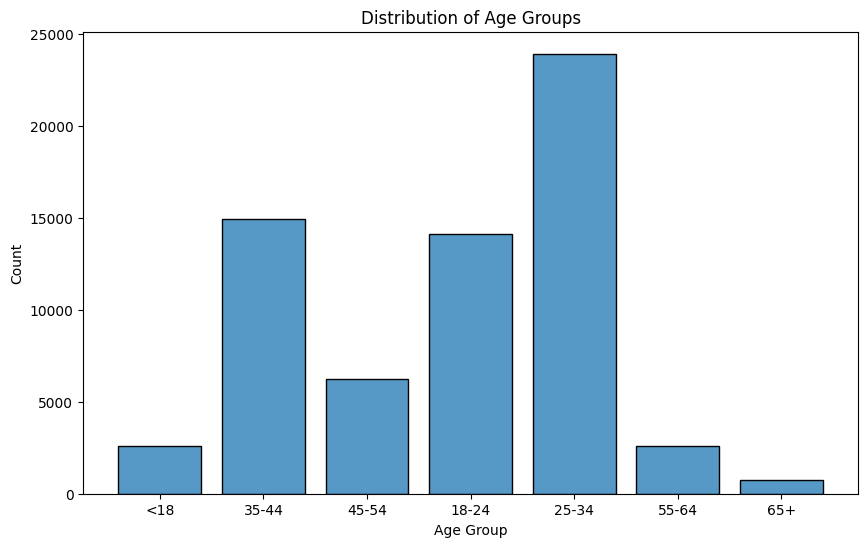

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AgeGroup', shrink=0.8)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Education Level

/var/folders/y8/k6j41b297f9ffd89h3tmy6xm0000gn/T/ipykernel_2344/2782881029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis', order=education_counts.index)


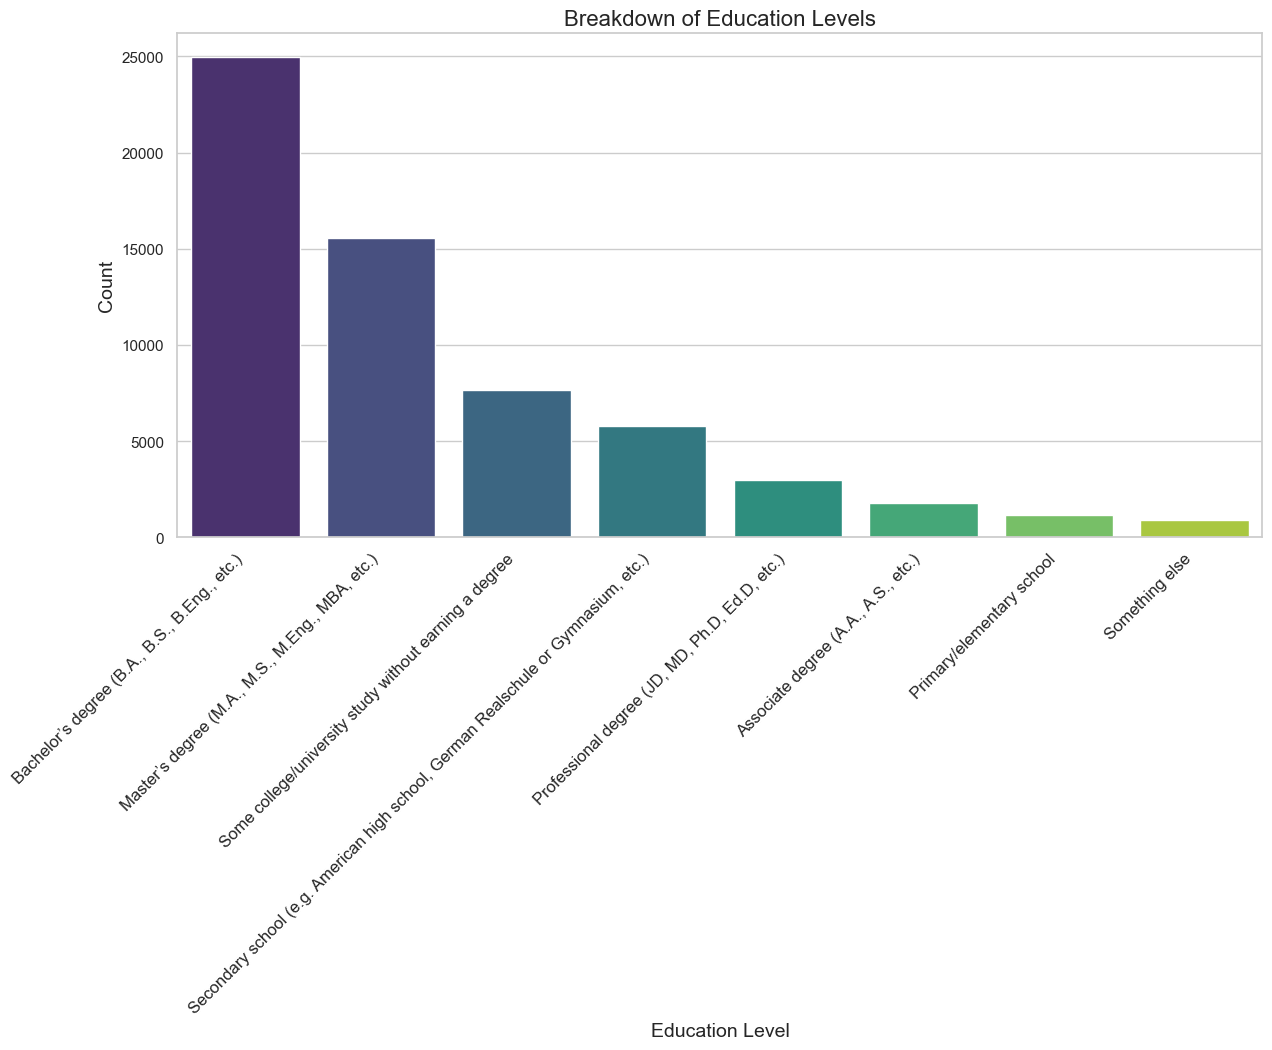

In [9]:
education_counts = df['EdLevel'].value_counts()
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))  
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis', order=education_counts.index)

plt.title('Breakdown of Education Levels', fontsize=16)  
plt.xlabel('Education Level', fontsize=14)  
plt.ylabel('Count', fontsize=14)  

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.subplots_adjust(bottom=0.25)  
plt.show()


Professional Characteristics

Job Role vs. Satisfaction

/var/folders/y8/k6j41b297f9ffd89h3tmy6xm0000gn/T/ipykernel_2344/2780453046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DevType', y='JobSat', data=df, palette='viridis')


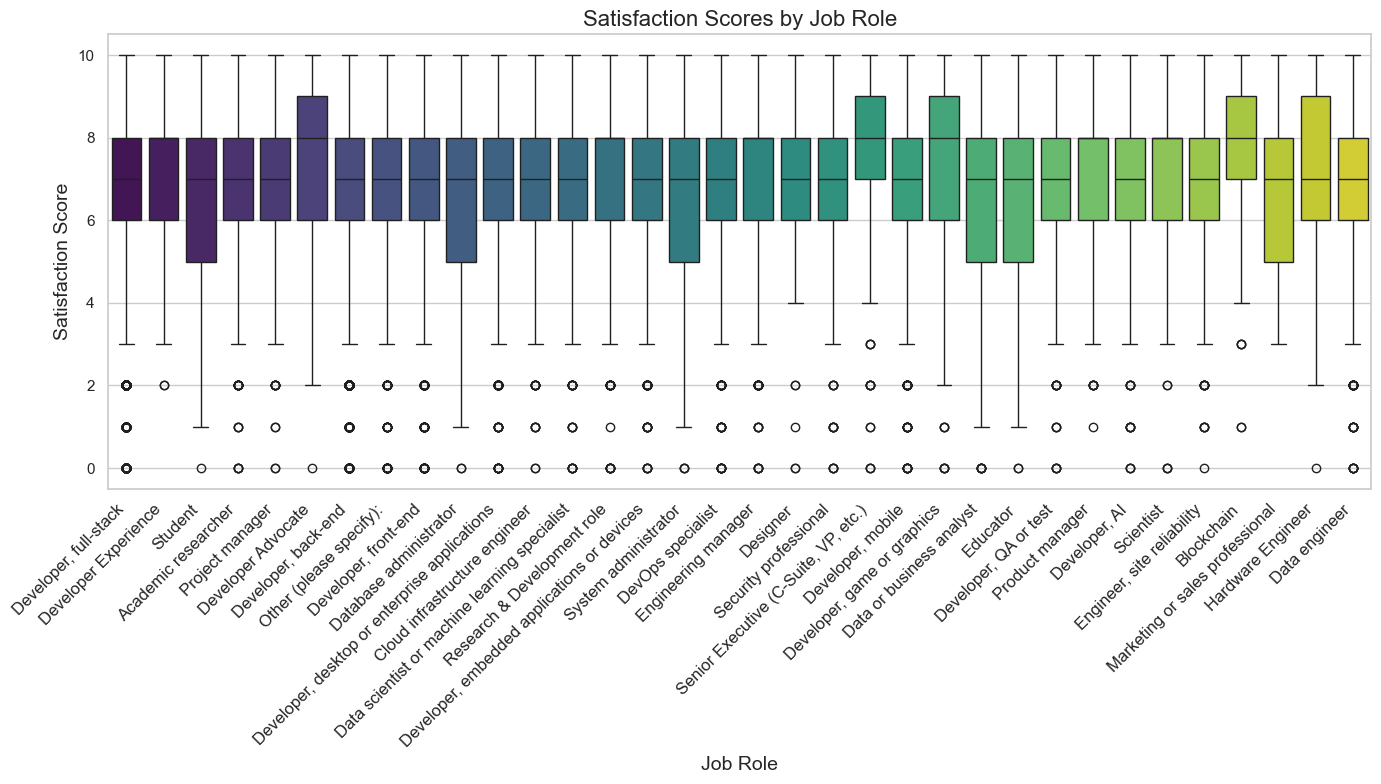

In [10]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 8)) 
sns.boxplot(x='DevType', y='JobSat', data=df, palette='viridis')

plt.title('Satisfaction Scores by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)  

plt.tight_layout() 
plt.show()


Experience vs. Satisfaction

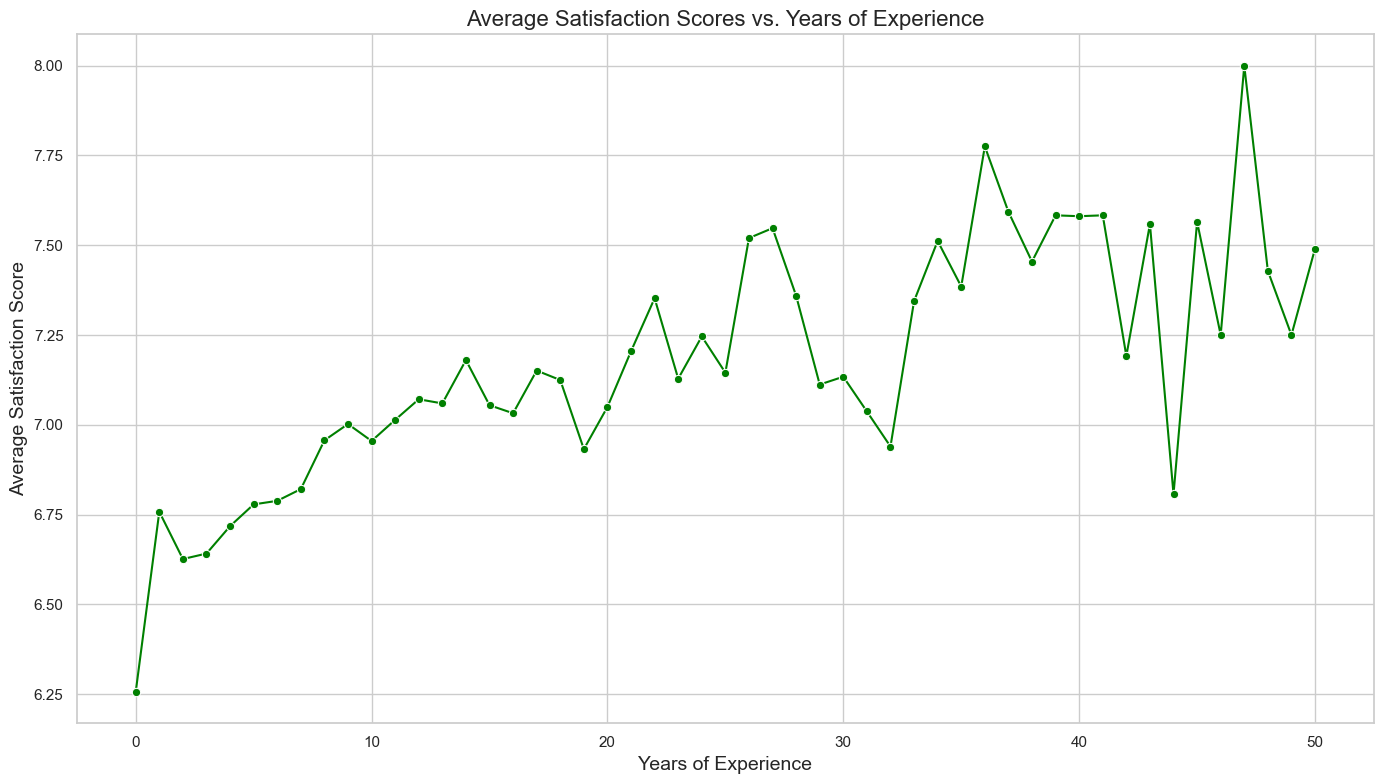

In [11]:
avg_satisfaction = df.groupby('WorkExp')['JobSat'].mean().reset_index()
plt.figure(figsize=(14, 8)) 
sns.lineplot(x='WorkExp', y='JobSat', data=avg_satisfaction, marker='o', color='green')
plt.title('Average Satisfaction Scores vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Average Satisfaction Score', fontsize=14)
plt.tight_layout()
plt.show()


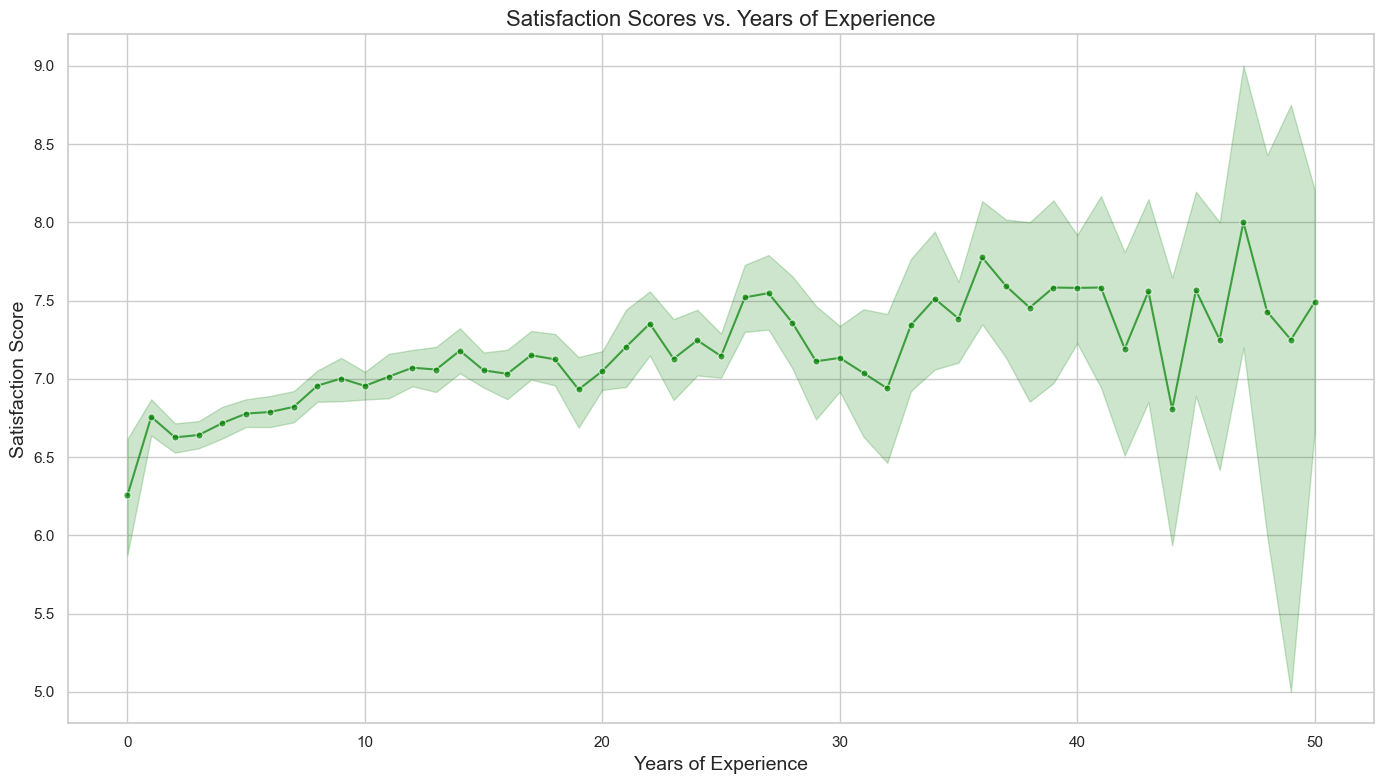

In [12]:
# Create a line plot without averaging
plt.figure(figsize=(14, 8))  
sns.lineplot(x='WorkExp', y='JobSat', data=df, color='green', marker='o', markersize=5, alpha=0.7)
plt.title('Satisfaction Scores vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)
plt.tight_layout()
plt.show()


Work Environment Insights

Remote Vs. In Office Work Satisfaction

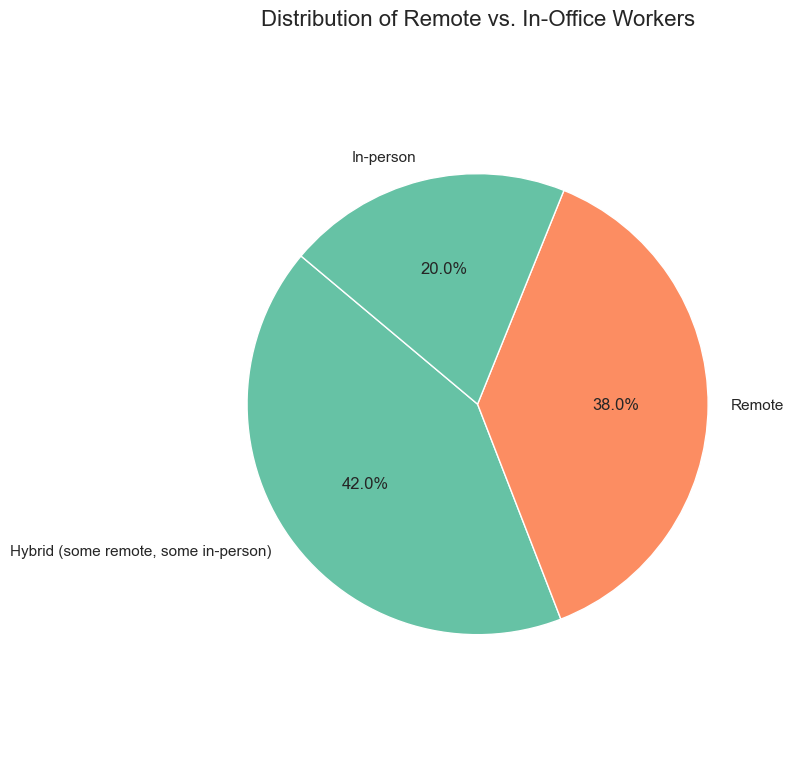

In [13]:
satisfaction_counts = df['RemoteWork'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Remote vs. In-Office Workers', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

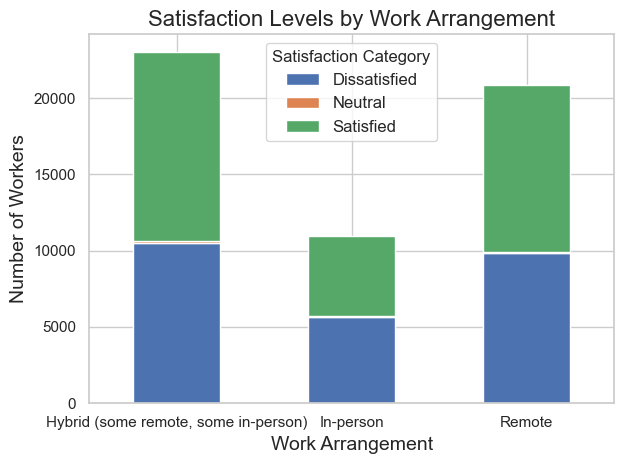

In [14]:
# Step 1: Categorize satisfaction scores
def categorize_satisfaction(score):
    if score > 1:
        return 'Satisfied'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Dissatisfied'

# Apply categorization
df['SatisfactionCategory'] = df['JobSat'].apply(categorize_satisfaction)

# Step 2: Count categories by work arrangement
satisfaction_counts = df.groupby(['RemoteWork', 'SatisfactionCategory']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar', stacked=True)
plt.title('Satisfaction Levels by Work Arrangement', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=14)
plt.ylabel('Number of Workers', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Category', fontsize=12)
plt.tight_layout()
plt.show()




Company Size and Satisfaction

/var/folders/y8/k6j41b297f9ffd89h3tmy6xm0000gn/T/ipykernel_2344/3951540718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='OrgSize', x='JobSat', data=average_satisfaction, palette='viridis')


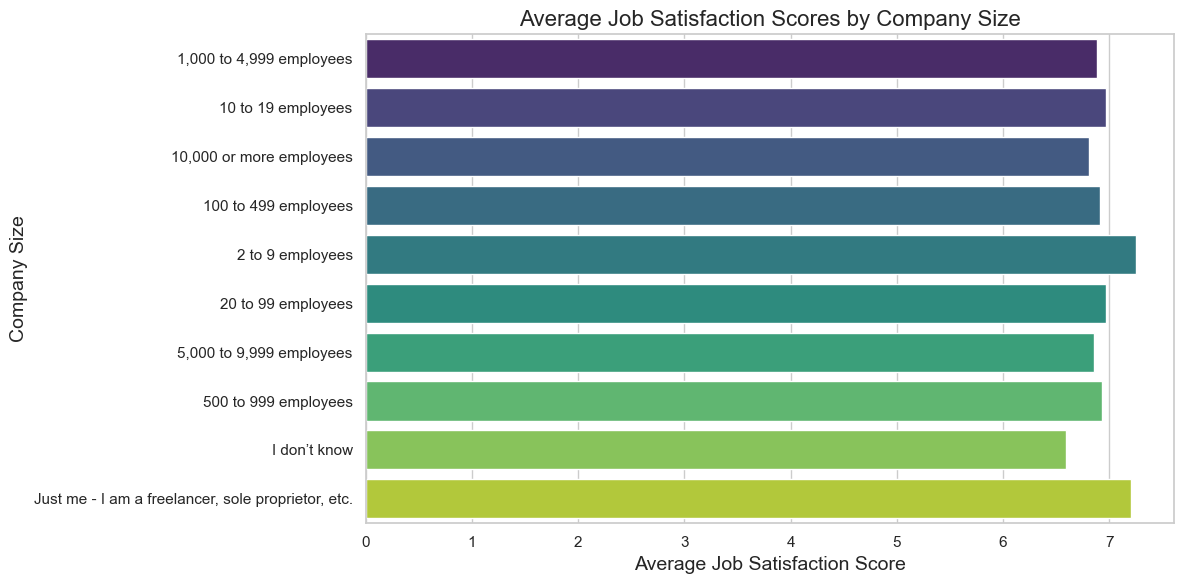

In [15]:
# Group by company size and calculate average satisfaction scores
average_satisfaction = df.groupby('OrgSize')['JobSat'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(y='OrgSize', x='JobSat', data=average_satisfaction, palette='viridis')
plt.title('Average Job Satisfaction Scores by Company Size', fontsize=16)
plt.xlabel('Average Job Satisfaction Score', fontsize=14)
plt.ylabel('Company Size', fontsize=14)
plt.tight_layout()
plt.show()



Compensation and Benefits

Salary vs. Satisfaction

/var/folders/y8/k6j41b297f9ffd89h3tmy6xm0000gn/T/ipykernel_2344/1591887687.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_satisfaction = df.groupby('SalaryRange')['JobSat'].mean().reset_index()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '<10k'),
  Text(1, 0, '10k-20k'),
  Text(2, 0, '20k-30k'),
  Text(3, 0, '30k-60k'),
  Text(4, 0, '60k-90k'),
  Text(5, 0, '90k-120k'),
  Text(6, 0, '120k-150k'),
  Text(7, 0, '150k+')])

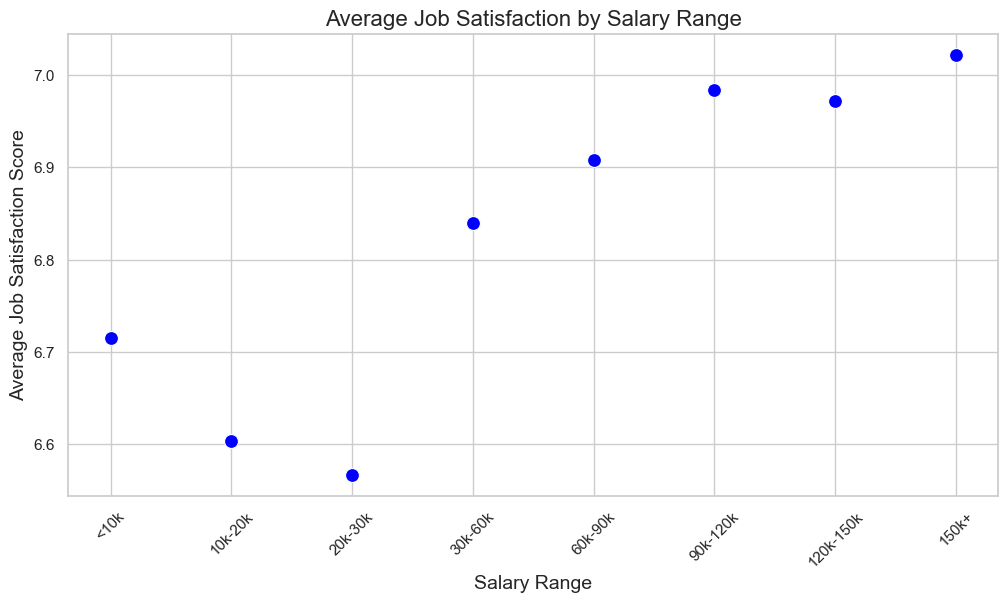

In [16]:
# Create salary ranges
bins = [0, 10000, 20000, 30000, 60000, 90000, 120000, 150000, float('inf')]  
labels = ['<10k', '10k-20k', '20k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
df['SalaryRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels)

average_satisfaction = df.groupby('SalaryRange')['JobSat'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_satisfaction, x='SalaryRange', y='JobSat', s=100, color='blue') 
plt.title('Average Job Satisfaction by Salary Range', fontsize=16)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Average Job Satisfaction Score', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  


Benefits vs. Satisfaction

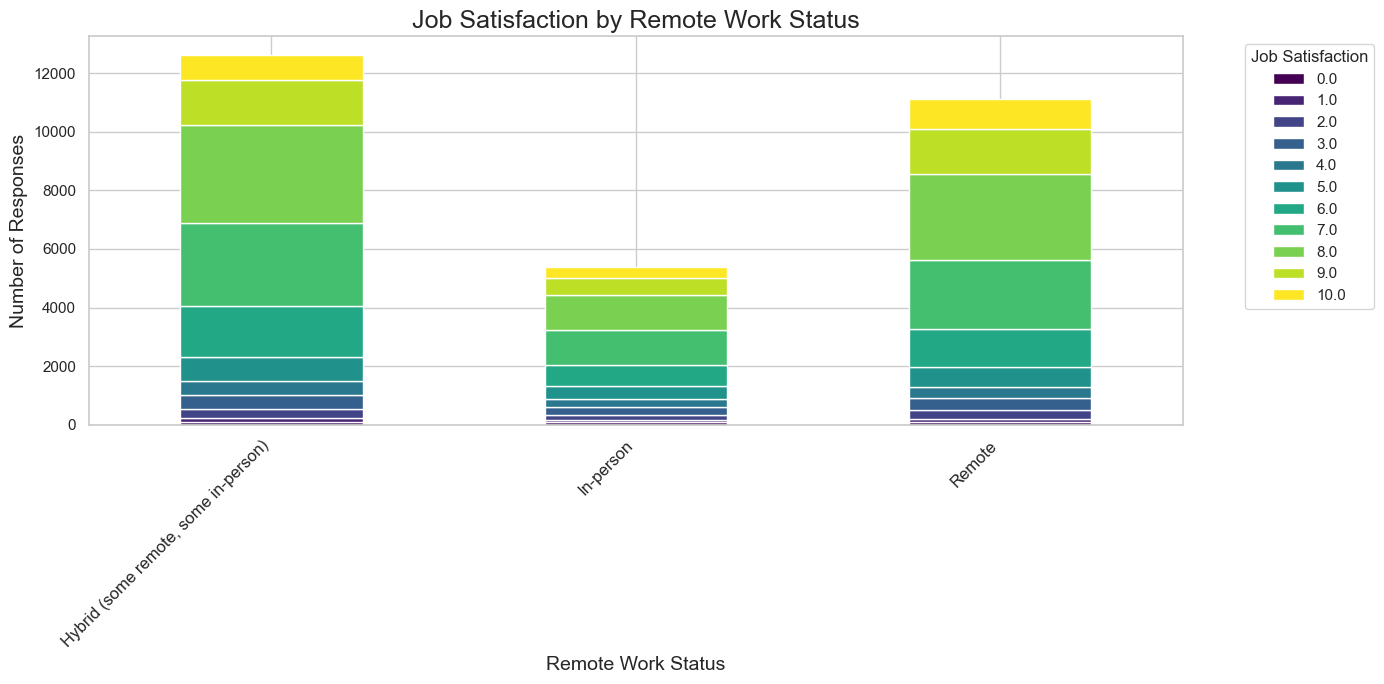

In [17]:
satisfaction_counts = df.groupby(['RemoteWork', 'JobSat']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 7))
ax = satisfaction_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Job Satisfaction by Remote Work Status', fontsize=18)
plt.xlabel('Remote Work Status', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


Career development

Opportunities for Growth vs. Satisfaction

In [25]:
# Display all column names
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'JobSat', 'AgeGroup',
       'SatisfactionCategory', 'SalaryRange'],
      dtype='object', length=117)


In [ ]:


# Define mapping for Knowledge_8
knowledge_mapping = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Map the categorical responses in Knowledge_8 to numerical values
df['Knowledge_8'] = df['Knowledge_8'].map(knowledge_mapping)

# Drop rows with NaN values in either column
df_growth_satisfaction = df[['Knowledge_8', 'JobSat']].dropna()

# Calculate the correlation matrix
correlation_matrix = df_growth_satisfaction.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)  # Choose your color map
plt.title('Correlation between Growth Opportunities and Job Satisfaction', fontsize=16)
plt.show()


Unique values in Knowledge_8: [nan 'Agree' 'Neither agree nor disagree' 'Disagree' 'Strongly agree'
 'Strongly disagree']


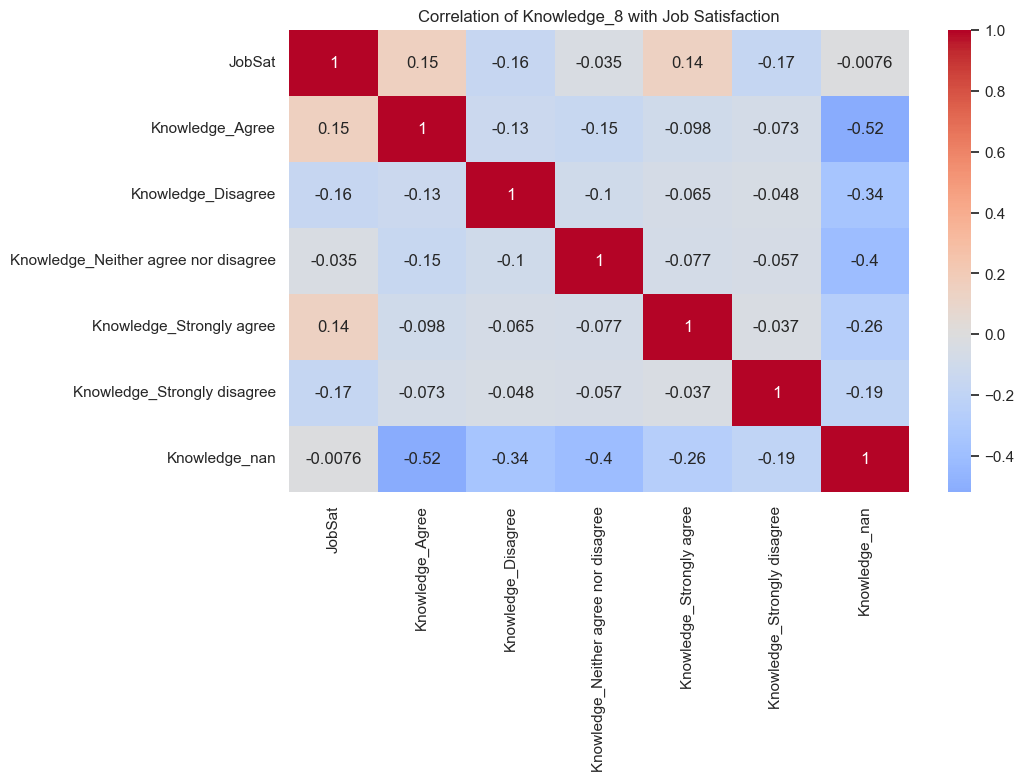

In [61]:
# Check unique values in Knowledge_8
print("Unique values in Knowledge_8:", df['Knowledge_8'].unique())

knowledge_dummies = pd.get_dummies(df['Knowledge_8'], prefix='Knowledge', dummy_na=True)

df_combined = pd.concat([df, knowledge_dummies], axis=1)

correlation_matrix = df_combined[['JobSat'] + list(knowledge_dummies.columns)].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Knowledge_8 with Job Satisfaction')
plt.show()


Learning Resources

/var/folders/y8/k6j41b297f9ffd89h3tmy6xm0000gn/T/ipykernel_2344/3907440110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=learning_resources_satisfaction, x='Knowledge_9', y='JobSat', palette='viridis')


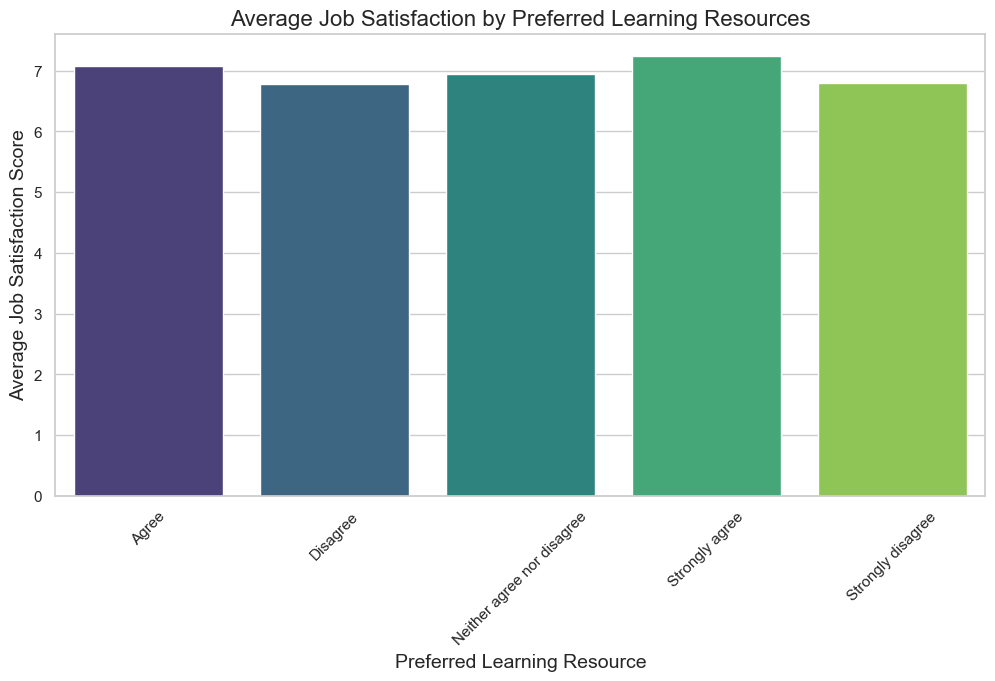

In [72]:
# Calculate the average JobSat for each Knowledge_9
learning_resources_satisfaction = df.groupby('Knowledge_9')['JobSat'].mean().reset_index()

# Create the vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=learning_resources_satisfaction, x='Knowledge_9', y='JobSat', palette='viridis')
plt.title('Average Job Satisfaction by Preferred Learning Resources', fontsize=16)
plt.xlabel('Preferred Learning Resource', fontsize=14)
plt.ylabel('Average Job Satisfaction Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Country

In [23]:
# Create a function to standardize country names using pycountry
def standardize_country_name(country_name):
    try:
        # Try to get the country from the pycountry library
        return pycountry.countries.lookup(country_name).name
    except LookupError:
        return country_name  # Return the original if not found

# Apply the function to the Country column
df['Country'] = df['Country'].apply(standardize_country_name)



# List of known country names (you can get this from pycountry)
known_countries = [country.name for country in pycountry.countries]

# Define a function to get the best match for a given country name
def get_best_country_match(country_name):
    if isinstance(country_name, str):
        best_match, score = process.extractOne(country_name, known_countries)
        if score > 80:  # Adjust the threshold as needed
            return best_match
    return country_name  # Return original if no match

# Apply the fuzzy matching function to the Country column
df['Country'] = df['Country'].apply(get_best_country_match)

# Check unique values after standardization
print(df['Country'].unique())

['United States' 'United Kingdom' 'Canada' 'Norway' 'Uzbekistan' 'Serbia'
 'Poland' 'Philippines' 'Bulgaria' 'Switzerland' 'India' 'Germany'
 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil' 'Japan' 'Austria'
 'Iran, Islamic Republic of' 'France' 'Saudi Arabia' 'Romania' 'Turkey'
 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia' 'Pakistan' 'Czechia'
 'North Macedonia' 'Finland' 'Slovakia' 'Russian Federation' 'Greece'
 'Israel' 'Belgium' 'Mexico' 'Tanzania, United Republic of' 'Hungary'
 'Argentina' 'Portugal' 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon'
 'Spain' 'South Africa' 'Lithuania' 'Viet Nam' 'Dominican Republic'
 'Indonesia' 'Kosovo' 'Morocco' 'Taiwan, Province of China' 'Georgia'
 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria' 'Liechtenstein' 'Denmark'
 'Ecuador' 'Malaysia' 'Albania' 'Azerbaijan' 'Chile' 'Ghana' 'Peru'
 'Bolivia, Plurinational State of' 'Egypt' 'Luxembourg' 'Montenegro'
 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 'Venezuela, Bolivarian Repub